1.	The authors report differences in therapeutic agents among certain variants. Are there any differences in the therapeutic efficacy of these agents for specific variants?

In [34]:
import pandas as pd
import numpy as np
from pathlib import Path
from analysis.database import get_config
from analysis.fisher_pct_plot import plot_fisher_pct

config = get_config()
data_all = pd.read_excel(
    Path.cwd().parent / "data" / f"individual_all_data-{config.version}.xlsx",
    index_col=0)
data_all.head()

,individual_id,sex,publication_id,title,first_author,reference,doi,year,publication_database,resource_uri,...,treatment_taken::Implantable cardioverter-defibrillator,treatment_taken::Left cardiac sympathetic denervation,treatment_taken::Verapamil,effective::Beta blocker,effective::Catheter ablation,effective::Enalapril,effective::Flecainide,effective::Implantable cardioverter-defibrillator,effective::Left cardiac sympathetic denervation,effective::Verapamil
0,1,NaN,1,Familial Evaluation in Catecholaminergic Polym...,Van Der Werf C,NaN,10.1161/CIRCEP.112.970517,2012,PubMed,https://pubmed.ncbi.nlm.nih.gov/22787013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,female,2,Flecainide therapy reduces exercise-induced ve...,"van der Werf, C",NaN,10.1016/j.jacc.2011.01.026,2011,PubMed,https://pubmed.ncbi.nlm.nih.gov/21616285,...,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN
2,3,male,3,Structural abnormalities on cardiac magnetic r...,"Gerber, D",NaN,10.1016/j.jacep.2020.03.006,2020,PubMed,https://pubmed.ncbi.nlm.nih.gov/32553227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,female,4,Genetic Background of Catecholaminergic Polymo...,"Kawamura, M",NaN,10.1253/circj.cj-12-1460,2013,PubMed,https://pubmed.ncbi.nlm.nih.gov/23595086,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,male,5,Gender differences in the inheritance mode of ...,"Ohno, S.",NaN,10.1371/journal.pone.0131517,2015,PubMed,https://pubmed.ncbi.nlm.nih.gov/26114861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
treatment_eff_columns = [
    col
    for col in data_all.columns
    if col.startswith("effective::")
]
treatment_eff_columns

['effective::Beta blocker',
 'effective::Catheter ablation',
 'effective::Enalapril',
 'effective::Flecainide',
 'effective::Implantable cardioverter-defibrillator',
 'effective::Left cardiac sympathetic denervation',
 'effective::Verapamil']

In [36]:
selected_columns = [
                       "individual_id",
                       "year",
                       "p_hgvs_aa1",
                       "Catecholaminergic polymorphic ventricular tachycardia 1",
                   ] + treatment_eff_columns
data = data_all[selected_columns].copy()
data = data[
    # only CPVT patients
    data["Catecholaminergic polymorphic ventricular tachycardia 1"] == 1
    ]
# only where at least one treatment efficacy is known
data = data[
    data[treatment_eff_columns].notna().any(axis=1)
]
print(data.shape)
display(data.info())
data.head()

(277, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 1 to 1331
Data columns (total 11 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   individual_id                                            277 non-null    int64  
 1   year                                                     277 non-null    int64  
 2   p_hgvs_aa1                                               271 non-null    object 
 3   Catecholaminergic polymorphic ventricular tachycardia 1  277 non-null    float64
 4   effective::Beta blocker                                  242 non-null    float64
 5   effective::Catheter ablation                             12 non-null     float64
 6   effective::Enalapril                                     2 non-null      float64
 7   effective::Flecainide                                    105 non-null    float64
 8   effective::Implantable c

None

,individual_id,year,p_hgvs_aa1,Catecholaminergic polymorphic ventricular tachycardia 1,effective::Beta blocker,effective::Catheter ablation,effective::Enalapril,effective::Flecainide,effective::Implantable cardioverter-defibrillator,effective::Left cardiac sympathetic denervation,effective::Verapamil
1,2,2011,Y4962C,1.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN
11,12,2016,Y4080C,1.0,0.0,NaN,NaN,NaN,1.0,0.0,NaN
27,28,2009,W4645R,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
28,29,2009,W4645R,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
32,33,2009,W4645R,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN


In [37]:
# top variants with data
df_counts = data["p_hgvs_aa1"].value_counts().to_frame()
display(df_counts.head())
df_counts[
    df_counts["count"] > 5
    ]

,count
p_hgvs_aa1,
R420W,19
R420Q,18
M3978I,15
G2337V,11
S2246L,9


,count
p_hgvs_aa1,
R420W,19
R420Q,18
M3978I,15
G2337V,11
S2246L,9
R4497C,8
C2277R,8
S4124G,8
E1724K,7


In [38]:
# which treatments actually have data
data[treatment_eff_columns].notna().sum()

effective::Beta blocker                              242
effective::Catheter ablation                          12
effective::Enalapril                                   2
effective::Flecainide                                105
effective::Implantable cardioverter-defibrillator    106
effective::Left cardiac sympathetic denervation       16
effective::Verapamil                                  21
dtype: int64

In [39]:
def is_effective(x: pd.Series):
    return np.sum(x == 1)


def not_effective(x: pd.Series):
    return np.sum(x == 0)


totals = data.dropna(
    subset=["effective::Beta blocker"]
).groupby("p_hgvs_aa1")["effective::Beta blocker"].agg(
    total=lambda x: x.count()
)

display(totals.head())

f_bb = data.dropna(
    subset=["effective::Beta blocker"]
).groupby("p_hgvs_aa1")["effective::Beta blocker"].agg(
    is_effective=is_effective,
    not_effective=not_effective
)
f_bb["Total"] = (
        f_bb["is_effective"] +
        f_bb["not_effective"]
)

f_bb.head()

,total
p_hgvs_aa1,
A165D,1
A2254V,1
A2317T,1
A2387P,1
A2394G,2


,is_effective,not_effective,Total
p_hgvs_aa1,,,
A165D,1,0,1
A2254V,1,0,1
A2317T,1,0,1
A2387P,1,0,1
A2394G,2,0,2


In [40]:
# make sure is_effective + not_effective = total
assert np.all(f_bb["Total"] == totals["total"])

In [41]:
import os


def create_fisher_table(
        # the input dataframe
        input_df: pd.DataFrame,
        # what treatment to look at
        treatment_name: str,
        selected_variants: list[str],
):
    input_df = input_df.copy()
    input_df = input_df[
        input_df["p_hgvs_aa1"].isin(selected_variants)
    ]

    fish_table = input_df.dropna(
        subset=[f"effective::{treatment_name}"]
    ).groupby(
        "p_hgvs_aa1"
    )[f"effective::{treatment_name}"].agg(
        effective=is_effective,
        not_effective=not_effective
    )

    fish_table["Total"] = (
            fish_table[f"effective"] +
            fish_table[f"not_effective"]
    )

    # rename the index to "p_hgvs_string"
    fish_table.index.name = "p_hgvs_string"
    # rename the columns
    fish_table.columns = [
        f"is_effective ({treatment_name})",
        f"not_effective ({treatment_name})",
        "Total"
    ]

    return fish_table


config = get_config()

# create dir for figures
figures_dir = Path(
    os.path.join("..", "figures", config.version_for_dir,
                 "analysis_16_treatment_efficacy"))

if not os.path.exists(figures_dir):
    print(f"Creating directory: {figures_dir}")
    os.makedirs(figures_dir)

In [42]:
# for flecainide - keep only 2013 + after
data_2013 = data[
    data["year"] >= 2013
    ]

In [43]:
data.head()

,individual_id,year,p_hgvs_aa1,Catecholaminergic polymorphic ventricular tachycardia 1,effective::Beta blocker,effective::Catheter ablation,effective::Enalapril,effective::Flecainide,effective::Implantable cardioverter-defibrillator,effective::Left cardiac sympathetic denervation,effective::Verapamil
1,2,2011,Y4962C,1.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN
11,12,2016,Y4080C,1.0,0.0,NaN,NaN,NaN,1.0,0.0,NaN
27,28,2009,W4645R,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
28,29,2009,W4645R,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
32,33,2009,W4645R,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN


In [44]:
# probably can only do BB, F, and ICD since the rest basically has no data
min_counts = 3
# these variantsd selected becausae top
# + we have functional data on them
selected_variants = [
    "G357S",
    "R420W",
    "R420Q",
    "G2337V",
    "S2246L",
    "C2277R",
    "G3572"
]
for treatment in [
    "Beta blocker",
    "Flecainide",
    "Implantable cardioverter-defibrillator",
]:
    fisher_df = create_fisher_table(
        data if treatment != "Flecainide" else data_2013,
        treatment_name=treatment,
        # selected_variants=df_counts[
        #     df_counts["count"] > 5
        #     ].index,
        selected_variants=selected_variants
    )

    print(f"Elimintating rows with less than {min_counts}")
    fisher_df = fisher_df[
        fisher_df["Total"] >= min_counts
        ]

    display(fisher_df)

    fisher_df.to_csv(
        figures_dir / f"fisher_table_{treatment}.csv",
    )


Elimintating rows with less than 3


,is_effective (Beta blocker),not_effective (Beta blocker),Total
p_hgvs_string,,,
C2277R,2,6,8
G2337V,10,1,11
G357S,3,0,3
R420Q,10,8,18
R420W,5,12,17
S2246L,4,5,9


Elimintating rows with less than 3


,is_effective (Flecainide),not_effective (Flecainide),Total
p_hgvs_string,,,
C2277R,6,0,6
R420W,6,1,7
S2246L,2,1,3


Elimintating rows with less than 3


,is_effective (Implantable cardioverter-defibrillator),not_effective (Implantable cardioverter-defibrillator),Total
p_hgvs_string,,,
R420Q,4,5,9
R420W,5,1,6
S2246L,6,2,8


In [45]:
data_2013[
    data_2013["p_hgvs_aa1"].isin(selected_variants)
].dropna(
    subset=["effective::Flecainide"]
).groupby("p_hgvs_aa1")["effective::Flecainide"].agg(
    total=lambda x: x.count()
)

,total
p_hgvs_aa1,
C2277R,6
R420Q,1
R420W,7
S2246L,3


In [46]:
fisher_bb = create_fisher_table(
    data,
    treatment_name="Beta blocker",
    selected_variants=selected_variants
)

fisher_bb

,is_effective (Beta blocker),not_effective (Beta blocker),Total
p_hgvs_string,,,
C2277R,2,6,8
G2337V,10,1,11
G357S,3,0,3
R420Q,10,8,18
R420W,5,12,17
S2246L,4,5,9


## Plotting

,is_effective (Beta blocker),not_effective (Beta blocker),Total,is_effective (Beta blocker)_pct,total_pct
p_hgvs_string,,,,,
C2277R,2,6,8,25.000000,100
G2337V,10,1,11,90.909091,100
G357S,3,0,3,100.000000,100
R420Q,10,8,18,55.555556,100
R420W,5,12,17,29.411765,100
S2246L,4,5,9,44.444444,100


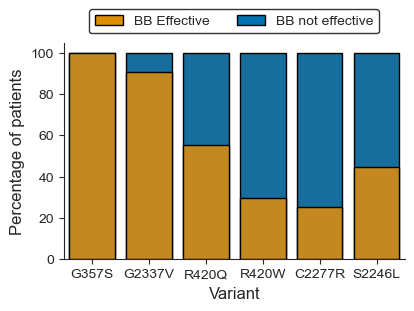

In [47]:
from functools import partial
from analysis.database import FigureParams, set_figure_size
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")

plot_bb_percentages = partial(plot_fisher_pct, figures_dir=figures_dir)

plot_order = [
    "G357S",
    "G2337V",
    "R420Q",
    "R420W",
    "C2277R",
    "S2246L",
]

plot_bb_percentages(
    df_fish=fisher_bb,
    panel=get_config().treatment_pcts.panels["flecainide_pct"],
    group_a="is_effective (Beta blocker)",
    legend_a="BB Effective",
    legend_b="BB not effective",
    plt_name="bb_effective",
    plt_order=plot_order
)


,is_effective (Beta blocker),not_effective (Beta blocker),Total,is_effective (Beta blocker)_pct,total_pct
p_hgvs_string,,,,,
C2277R,2,6,8,25.000000,100
G2337V,10,1,11,90.909091,100
G357S,3,0,3,100.000000,100
R420Q,10,8,18,55.555556,100
R420W,5,12,17,29.411765,100
S2246L,4,5,9,44.444444,100


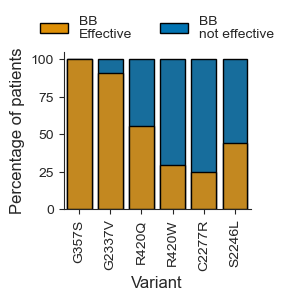

In [48]:
plot_bb_percentages(
    df_fish=fisher_bb,
    panel=get_config().treatment_pcts.panels["icd_pct_3x2"],
    group_a="is_effective (Beta blocker)",
    legend_a="BB\nEffective",
    legend_b="BB\nnot effective",
    plt_name="3x2.bb_effective",
    plt_order=plot_order,
    rotate_x=True,
    legend_bb_anchor=(0.5, 1.15),
    frameon=False
)